In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

pd.options.display.float_format = '{:.2f}'.format

In [10]:
df = pd.read_csv('MarketArrivals_Ind.csv')
dfBang = df[df.city == 'BANGALORE']
dfBang.date = pd.DatetimeIndex(dfBang.date)
dfBang = dfBang.sort_values(by="date")
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')
data = pd.Series(dfBang['quantity'].to_list(), dfBang['date'].to_list())

C:\Users\mi\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


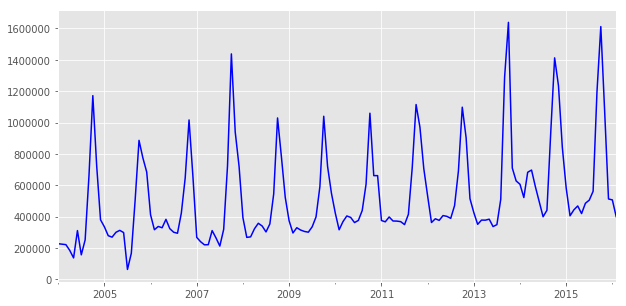

In [11]:
ax = data.plot(color='blue')

In [12]:
fit1 = ExponentialSmoothing(data, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

C:\Users\mi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [15]:
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(24).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()